In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [3]:
epoch=mne.read_epochs('D:\\USB Drive\\NewEEG-200s\\New\\20131216_1310_epo.fif')

Reading D:\USB Drive\NewEEG-200s\New\20131216_1310_epo.fif ...
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
1759 matching events found
Applying baseline correction (mode: mean)
1759 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.


<ipython-input-5-b7f46fb9f08f>:2: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.
  epoch.set_montage(montage)
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\mne\transforms.py:690: RuntimeWarning: invalid value encountered in true_divide
  out[:, 2] = np.arccos(cart[:, 2] / out[:, 0])


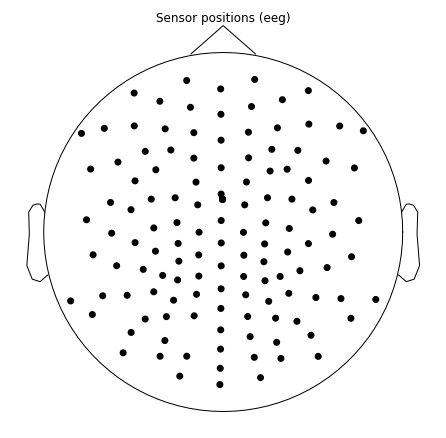

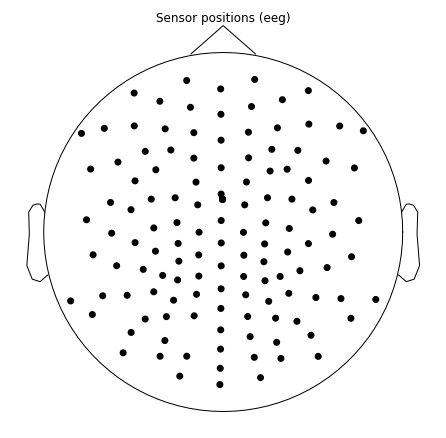

In [5]:
montage = mne.channels.read_montage('ANT_DukeWaveGuard_128_electrode_montages_updated_V4') 
epoch.set_montage(montage)  
epoch.plot_sensors()

In [7]:
if 'Nasium' in epoch.ch_names:
    epoch.drop_channels(ch_names=['Nasium', 'LL4', 'L12', 'VEOG','STI 014']);

In [8]:
def filter_event_id(epoch):
    newepoch=epoch
    epochs=[[]]
    j=0
    for i in range(len(newepoch.events[:,-1])):
        if i % 3 ==0:
            epochs.append([])
            j=j+1
            epochs[j].append(epoch.events[i,-1])
        else:
            epochs[j].append(epoch.events[i,-1])
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    epochs.pop(0)
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(newepoch.events)):
        newepoch.events[i]=flattened_list[i]
    return newepoch

In [9]:
epoch=filter_event_id(epoch)
print(epoch.events[:,-1])

[4 4 4 ... 4 4 4]


In [11]:
X = epoch.get_data()
y = epoch.events[:,-1]
print(X.shape,epoch.get_data().shape)
vec=Vectorizer()
X=vec.fit_transform(X)
X.shape

(1759, 125, 257) (1759, 125, 257)


(1759, 32125)

In [12]:
from sklearn import metrics

clf = RandomForestRegressor(n_estimators =110, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.9068181818181819


In [19]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape

In [20]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

STI 014    0.680589
R1         0.013212
Z12        0.010087
LL12       0.009564
L14        0.008863
LC1        0.008324
Rm         0.007871
RE3        0.007723
LA5        0.006045
LA1        0.005782
Z14        0.005479
L1         0.005406
R9         0.005255
L13        0.005156
RR12       0.005115
L2         0.005019
LL10       0.004949
RR10       0.004851
Z10        0.004773
LC5        0.004714
Z13        0.004605
LL1        0.004431
LL13       0.004335
R5         0.004313
R3         0.004259
LL2        0.004200
R8         0.004171
L10        0.003999
LL3        0.003968
LB1        0.003930
             ...   
LB6        0.001077
L11        0.001054
LB4        0.000982
Z6         0.000974
RC4        0.000965
Z3         0.000962
RD3        0.000853
RC5        0.000849
RD2        0.000839
RA1        0.000805
RB5        0.000796
RD5        0.000781
RD6        0.000769
LC4        0.000767
LC3        0.000758
LC6        0.000755
RD1        0.000746
LE1        0.000737
LD6        0.000698


In [21]:
epoch.drop_channels(ch_names=['STI 014']);

In [22]:
X = epoch.get_data()
y = epoch.events[:,-1]
print(X.shape,epoch.get_data().shape)
vec=Vectorizer()
X=vec.fit_transform(X)
X.shape

(1759, 124, 257) (1759, 124, 257)


(1759, 31868)

In [23]:
from sklearn import metrics

clf = RandomForestRegressor(n_estimators =110, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.6772727272727272


In [26]:
montage = mne.channels.read_montage(kind="ANT_DukeWaveGuard_128_electrode_montages_updated_V4")

In [24]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape

In [25]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

R2      0.033804
LD4     0.028823
LB3     0.026835
LC1     0.024156
R1      0.023747
LC4     0.018470
LD5     0.017054
LC3     0.015963
L14     0.015534
Z13     0.014750
RR11    0.014747
LL1     0.014387
Z14     0.014020
LD3     0.013004
LB4     0.012407
Lm      0.011133
R3      0.010915
LD6     0.010709
L1      0.010697
LL6     0.010570
RC3     0.010403
RD4     0.010326
LD2     0.010170
Z10     0.010134
RB6     0.010128
Rm      0.010088
LB1     0.009964
RR1     0.009943
R12     0.009935
LE4     0.009762
          ...   
LL7     0.004994
L7      0.004939
L9      0.004882
LC2     0.004814
LD1     0.004807
R5      0.004775
LB6     0.004700
Z5      0.004580
LL5     0.004569
L10     0.004556
RC6     0.004549
RC5     0.004533
RC7     0.004510
L4      0.004148
RA3     0.004148
RC2     0.004091
RR8     0.004059
L8      0.003957
RE1     0.003881
RR12    0.003873
RR4     0.003868
RD2     0.003768
R4      0.003735
RR5     0.003599
RD5     0.003546
RB2     0.003509
RA1     0.003091
RA2     0.0029

In [30]:
name=['R2','LD4','LB3','LC1','R1','LC4','LD5','LC3','L14','Z13','RR11','LL1','Z14','LD3','LB4','Lm','R3','LD6']

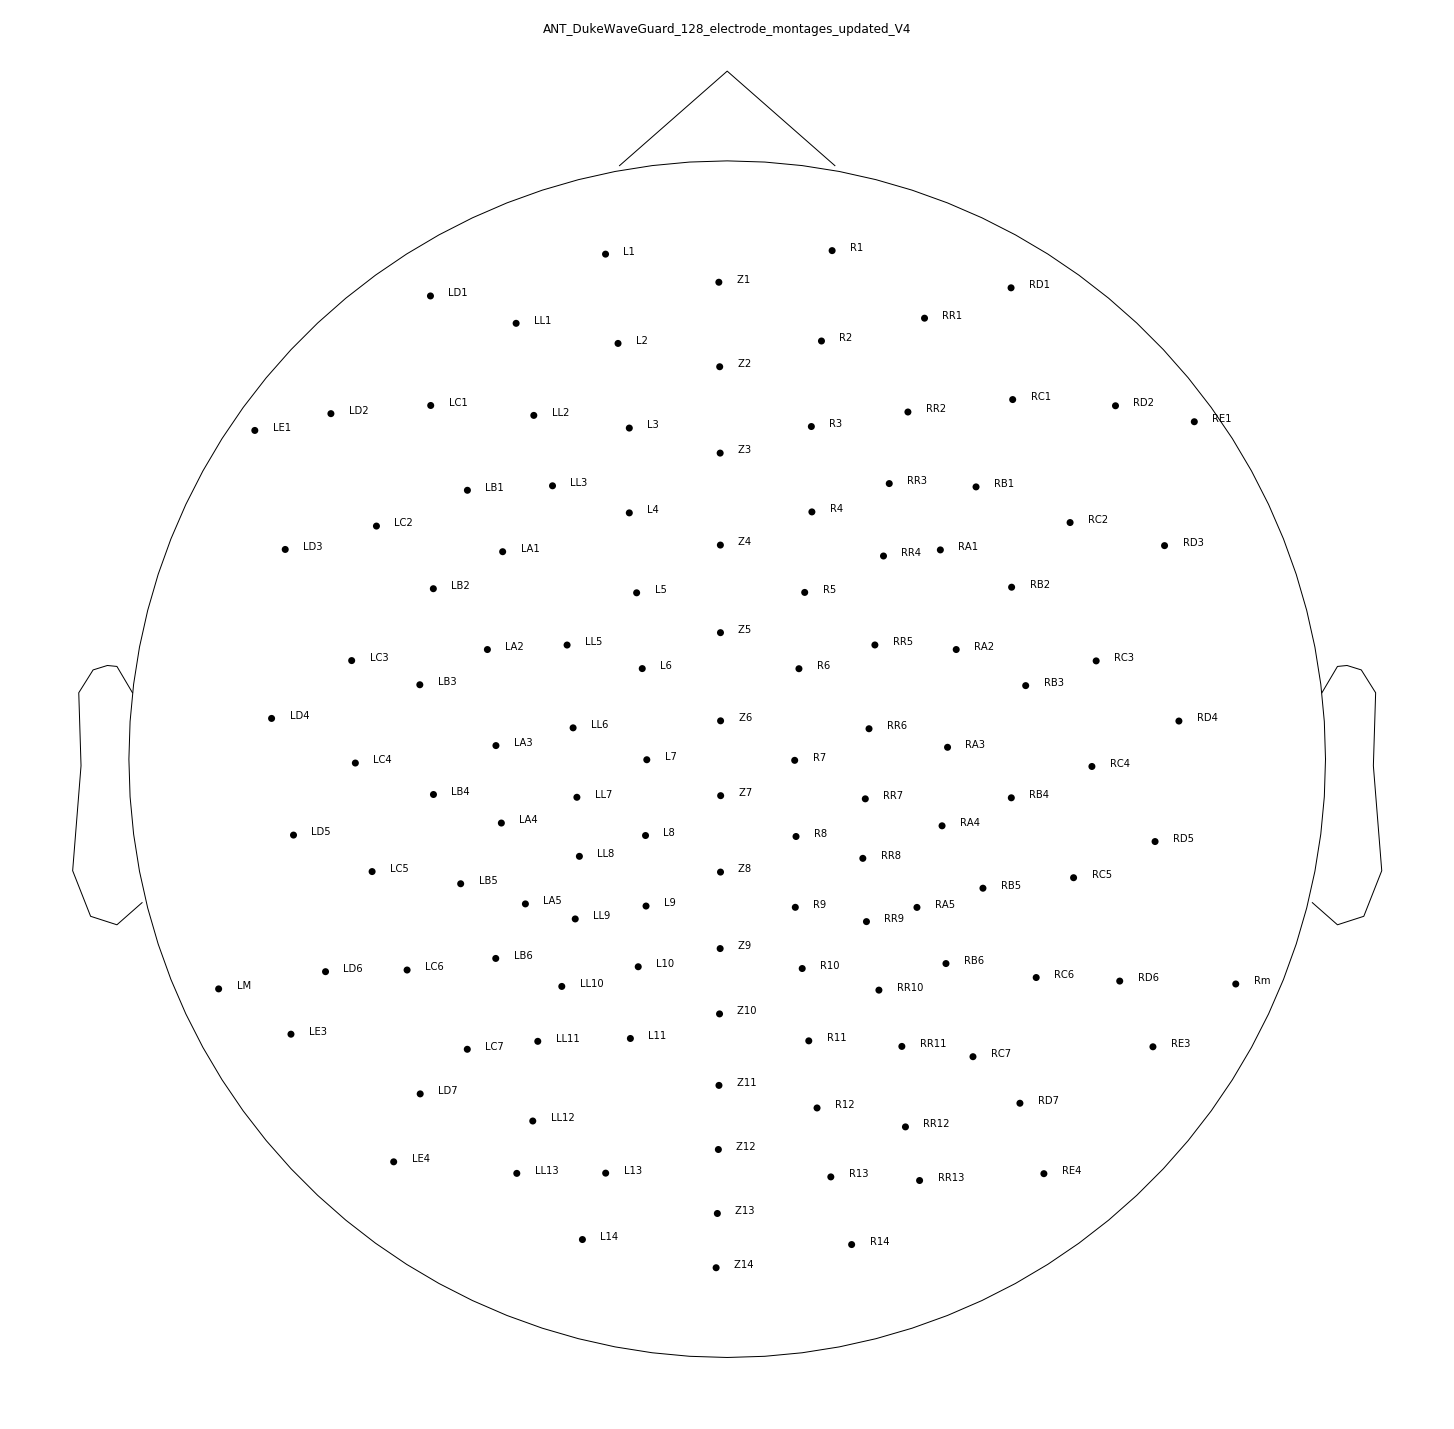

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
montage.plot(); 

matplotlib.rcParams.update({'font.size': 18})

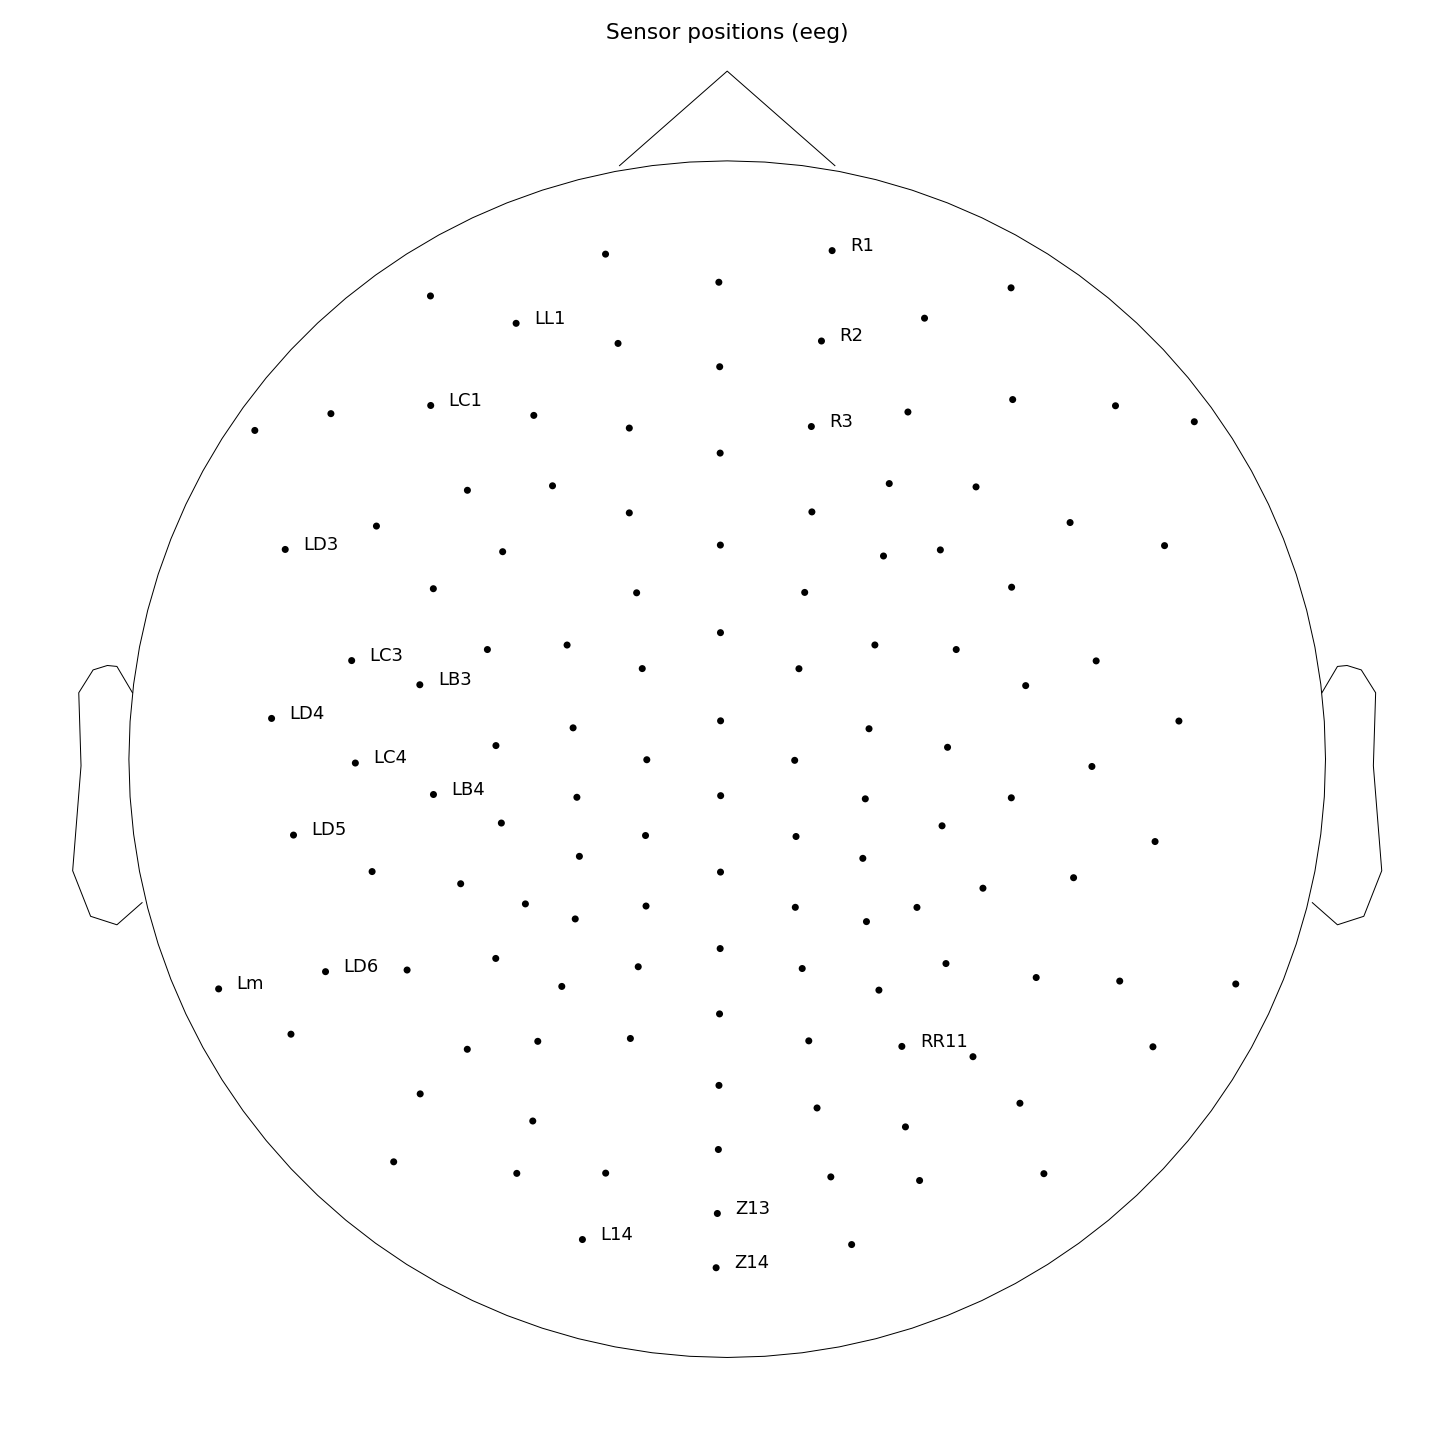

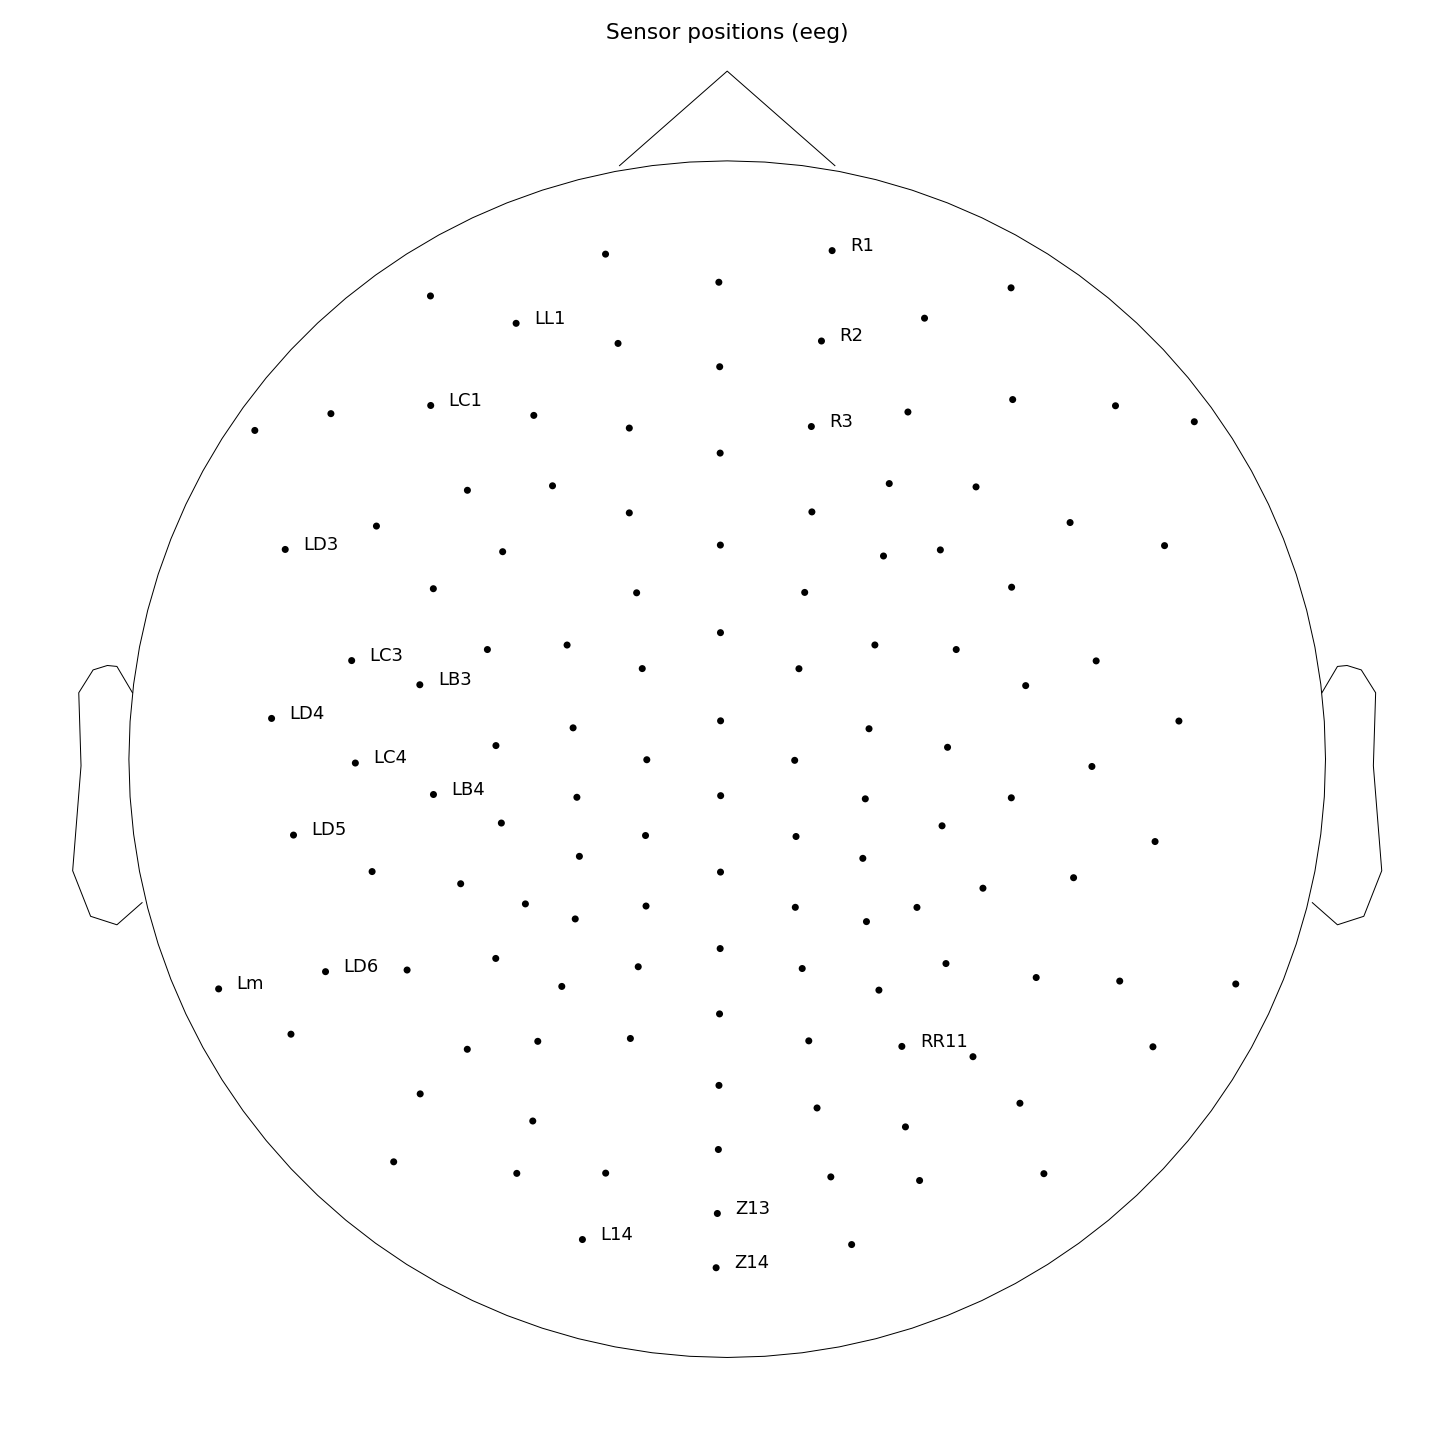

In [31]:
epoch.set_montage(montage)  
epoch.plot_sensors(show_names=name)

In [32]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances)):
    if i%257 != 0:
        n_sample.append(importances[i])
    else:
        n_sample=[]
        n_sample.append(importances[i])
        channel.append(n_sample)
channel=np.array(channel)
print(channel.shape,importances.shape)

(124, 257) (31868,)


In [45]:
import matplotlib

In [44]:
evoked = mne.EvokedArray(channel, epoch.info, tmin=epoch.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0., .500, .100), title='patterns',
                  **joint_kwargs)

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 576x302.4 with 9 Axes>

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 576x302.4 with 9 Axes>

In [50]:
matplotlib

<module 'matplotlib' from 'C:\\Users\\kingsly\\Anaconda3\\envs\\mne\\lib\\site-packages\\matplotlib\\__init__.py'>